# Collinearity and Multicolinearity 

Collinearity and Multicollinearity occur when there is a linear relationship between two or more variables.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
import seaborn as sns

#### Two vectors are collinear if they are pointing in the opposite or same direction.

Text(0.5,1,'Colinear in Same Directions')

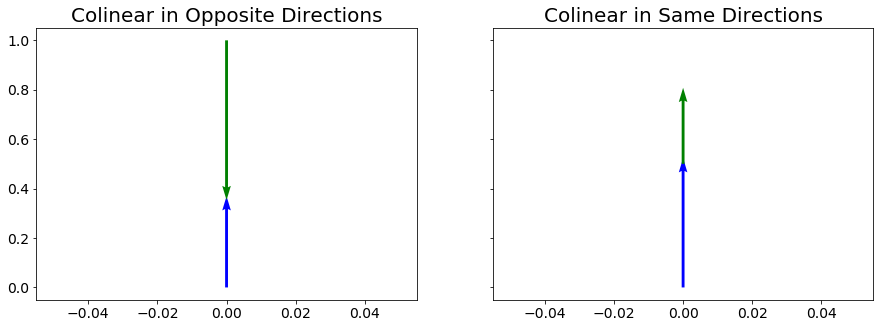

In [2]:
opp = np.array([[0,12],[0,-21]])
same = np.array([[0,17],[0,10]])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.quiver([0, 0], [0, 1],opp[:,0], opp[:,1], color=['b','g'], scale =50)
ax1.set_title('Colinear in Opposite Directions', size=20)
ax2.quiver([0, 0], [0, 0.5],same[:,0], same[:,1], color=['b','g'], scale =50)
ax2.set_title('Colinear in Same Directions', size=20)

#### Two variable are collinear if there is a linear relationship between them.  For simple datasets, it's often easy enough to look at individual scatterplots or pairwise scatterplots.

Text(0.5,1,'Collinearity')

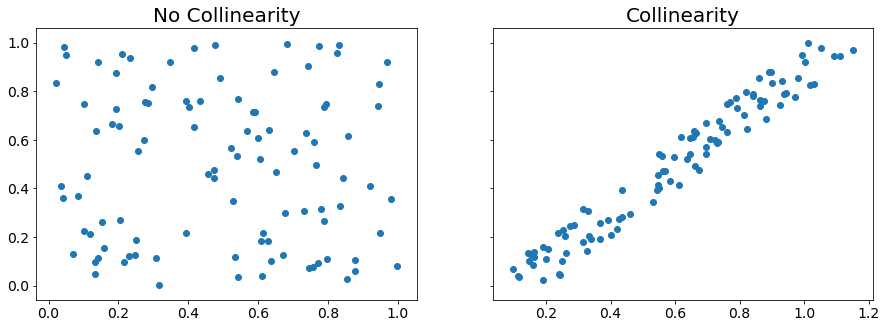

In [3]:
random1 = np.random.rand(100)
random2 = np.random.rand(100)
colinear = (random1 + (random2*0.2))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.scatter(random1,random2)
ax1.set_title('No Collinearity', size=20)
ax2.scatter(colinear,random1)
ax2.set_title('Collinearity', size=20)

#### For larger datasets, a pairplot can be very useful to view all the relationships in one plot.

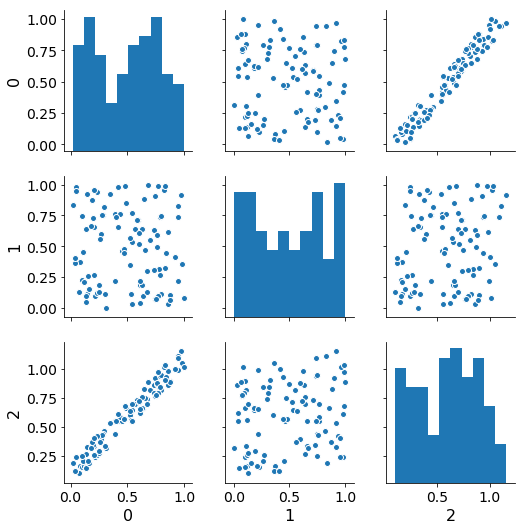

In [4]:
data = pd.DataFrame({0:random1,1:random2,2:colinear})
sns.pairplot(data)

#### Collinearity is not always visible by plotting and with larger datasets, this can become a very challenging task.

---

A correlation matrix can help to visualize correlations as well. Remember that the generated Correlation Variable 2 we created is Random variable 0 + (Random variable 1  * 0.2):


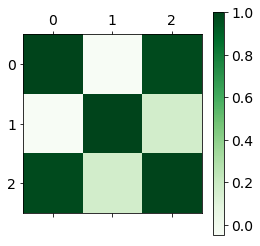

In [5]:
plt.matshow(data.corr(), cmap=plt.cm.Greens)
plt.colorbar()

plt.show()

#### Correlation matrices can be great for smaller datasets to spot even little correlations.

Notice that even though Random Variable 3 is a new randomly generated value that it still looks like it might have the same level of correlation with other randomly generated variables.

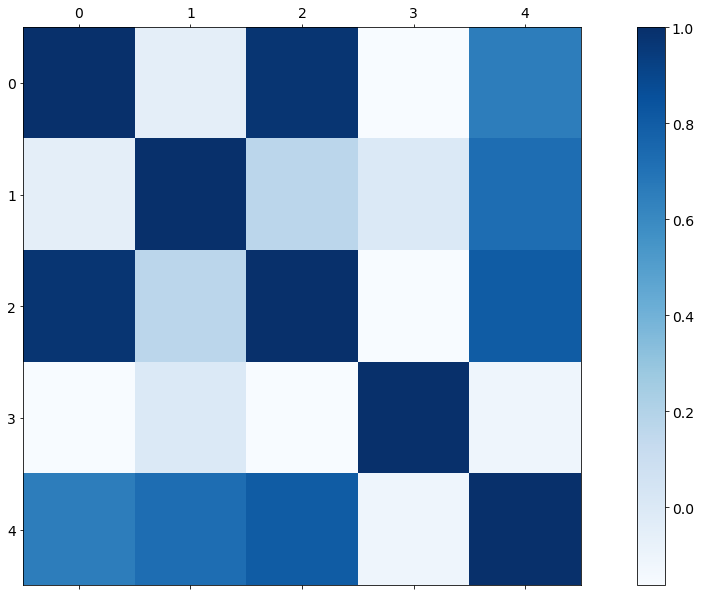

In [23]:
dataMore = pd.DataFrame({0:random1,1:random2,2:colinear,3:np.random.rand(100),4:random1+random2})

plt.figure(figsize=(20,10))
plt.matshow(dataMore.corr(), cmap=plt.cm.Blues, fignum=1)
plt.colorbar()

#### Collinearity between variables can be used for feature engineering:

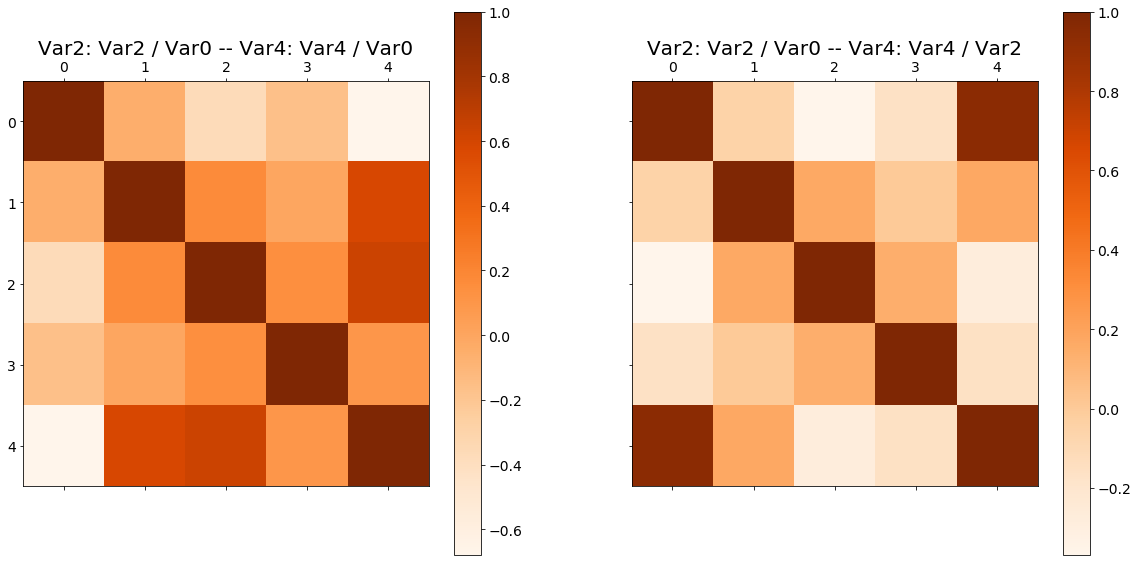

In [25]:
# transform collinear variable 2
dataMore[2] =  dataMore[2] / dataMore[0]

# transform multicollinear variable 4
dataMore[4] =  dataMore[4] / dataMore[0]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
im = ax1.matshow(dataMore.corr(), cmap=plt.cm.Oranges)
ax1.set_title('Var2: Var2 / Var0 -- Var4: Var4 / Var0', size=20)
f.colorbar(im,ax=ax1)

# Set Multicollinear Varible 4 back to its original state
dataMore[4] =  random1+random2

# transform Multicollinear Varible 4 in a different way
dataMore[4] =  dataMore[4] / dataMore[2]

im = ax2.matshow(dataMore.corr(), cmap=plt.cm.Oranges)
ax2.set_title('Var2: Var2 / Var0 -- Var4: Var4 / Var2', size=20)
f.colorbar(im,ax=ax2)